# Actividad 3.10 - Predicción de Riesgo de derrumbamiento - Terremotos

El objeto de esta actividad es participar en la competición de ofrecida de la web de DrivenData:
[Richter's Predictor: Modeling Earthquake Damage](https://www.drivendata.org/competitions/57/nepal-earthquake/)


# Descripcion del problema

Estamos tratando de predecir la variable ordinal `damage_grad`, que representa un nivel de daño en el edificio que fue golpeado por el terremoto. Hay 3 grados de daño:

- [1] representa poco daño
- [2] representa una cantidad media de daño
- [3] representa la destrucción casi completa

## Características

El conjunto de datos consiste principalmente en información sobre la estructura de los edificios y su propiedad legal. Cada fila del conjunto de datos representa un edificio específico en la región afectada por el terremoto de Gorkha.

Hay 39 columnas en este conjunto de datos, donde la columna `building_id` es un identificador único y aleatorio. Las 38 funciones restantes se describen en la siguiente sección. Las variables categóricas se ofuscaron con caracteres ascii aleatorios en minúsculas. La aparición del mismo carácter en columnas distintas **no** implica el mismo valor original.

## Descripcion de caracteristicas

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` ***(tipo: int)***: región geográfica en la que existe el edificio, desde el más grande (nivel 1) hasta la subregión más específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.
- `count_floors_pre_eq` ***(type: int)***: número de pisos que tenía el edificio antes del terremoto.
- `edad` ***(tipo: int)***: antigüedad del edificio en años.
- `area_percentage` ***(tipo: int)***: área normalizada de la huella del edificio.
- `porcentaje_altura` ***(tipo: int)***: altura normalizada de la huella del edificio.
- `land_surface_condition` (tipo: categórico): estado de la superficie del terreno donde se construyó el edificio. Valores posibles: n, o, t.
- `foundation_type` ***(tipo: categórico)***: tipo de cimentación utilizada durante la construcción. Valores posibles: h, i, r, u, w.
- `roof_type` ***(tipo: categórico)***: tipo de techo utilizado durante la construcción. Valores posibles: n, q, x.
- `ground_floor_type` ***(tipo: categórico)***: tipo de la planta baja. Valores posibles: f, m, v, x, z.
- `other_floor_type` ***(tipo: categórico)***: tipo de construcciones utilizadas en plantas superiores a la baja (excepto de cubierta). Valores posibles: j, q, s, x.
- `posición` ***(tipo: categórico)***: posición del edificio. Valores posibles: j, o, s, t.
- `plan_configuration` ***(tipo: categórico)***: configuración del plano del edificio. Valores posibles: a, c, d, f, m, n, o, q, s, u.
- `has_superstructure_adobe_mud` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Adobe/Mud.
- `has_superstructure_mud_mortar_stone` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Mud Mortar - Stone.
- `has_superstructure_stone_flag` ***(tipo: binario)***: variable de bandera que indica si la superestructura fue hecha de piedra.
- `tiene_superestructura_cemento_mortero_piedra` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Cemento - Piedra.
- `has_superstructure_mud_mortar_brick` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Barro - Ladrillo.
- `has_superstructure_cement_mortar_brick` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Mortero de Cemento - Ladrillo.
- `has_superstructure_timber` ***(tipo: binario)***: variable flag que indica si la superestructura fue de Madera.
- `has_superstructure_bamboo` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de Bambú.
- `has_superstructure_rc_non_engineered` ***(tipo: binario)***: variable indicadora que indica si la superestructura fue hecha de hormigón armado sin ingeniería.
- `has_superstructure_rc_engineered` ***(tipo: binario)***: variable indicadora que indica si la superestructura fue hecha de hormigón armado de ingeniería.
- `has_superstructure_other` ***(tipo: binario)***: variable flag que indica si la superestructura fue hecha de algún otro material.
- `legal_ownership_status` ***(tipo: categórico)***: estado legal de propiedad del terreno donde se construyó la edificación. Valores posibles: a, r, v, w.
- `count_families` ***(type: int)***: número de familias que viven en el edificio.
- `has_secondary_use` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó para algún propósito secundario.
- `has_secondary_use_agriculture` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó con fines agrícolas.
- `has_secondary_use_hotel` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como hotel.
- `has_secondary_use_rental` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó para fines de alquiler.
- `has_secondary_use_institution` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como sede de alguna institución.
- `has_secondary_use_school` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como escuela.
- `has_secondary_use_industry` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado para fines industriales.
- `has_secondary_use_health_post` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como puesto de salud.
- `has_secondary_use_gov_office` ***(tipo: binario)***: variable indicadora que indica si el edificio fue utilizado como oficina gubernamental.
- `has_secondary_use_use_police` ***(tipo: binario)***: variable flag que indica si el edificio fue utilizado como comisaría.
- `has_secondary_use_other` ***(tipo: binario)***: variable indicadora que indica si el edificio se utilizó secundariamente para otros fines.


# Obtencion de los datos

In [2]:
import pandas as pd

In [3]:
X_train = pd.read_csv('./data/train_values.csv')
y_train = pd.read_csv('./data/train_labels.csv')
X_test = pd.read_csv('./data/test_values.csv')

In [4]:
X_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = y_train['damage_grade']

In [6]:
X_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


# Normalizacion de los datos

Es necesario transformar los datos que no sean numéricos para poder realizar la matriz de correlación y entrenar nuestro modelo.

## X_train

In [7]:
# Limpieza de datos: eliminar registros duplicados y reemplazar valores faltantes
X_train.drop_duplicates(inplace=True)
X_train.fillna(0, inplace=True)

# Obtenemos las columnas que no sean ya numericos
X_columns = X_train.select_dtypes(exclude='int').columns

# Iteramos sobre cada columna y realizamos la conversión a valores numéricos enteros
for i in X_columns:
    # Obtenemos la lista de valores únicos en la columna i
    data = X_train[i].unique().tolist()
    # Reemplazamos cada valor en la columna i con su correspondiente valor numérico entero
    X_train[i] = X_train[i].replace(data, list(range(len(data))))

X_train.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

## X_test

In [8]:
# Limpieza de datos: eliminar registros duplicados y reemplazar valores faltantes
X_test.drop_duplicates(inplace=True)
X_test.fillna(0, inplace=True)

# Obtenemos las columnas que no sean ya numericos
X_columns = X_test.select_dtypes(exclude='int').columns

# Iteramos sobre cada columna y realizamos la conversión a valores numéricos enteros
for i in X_columns:
    # Obtenemos la lista de valores únicos en la columna i
    data = X_test[i].unique().tolist()
    # Reemplazamos cada valor en la columna i con su correspondiente valor numérico entero
    X_test[i] = X_test[i].replace(data, list(range(len(data))))

X_test.dtypes

building_id                               int64
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick  

In [9]:
from sklearn.preprocessing import MaxAbsScaler

#Escalamos los datos
scaler = MaxAbsScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)

# Visualizacion de datos

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

**Matriz de correlación**

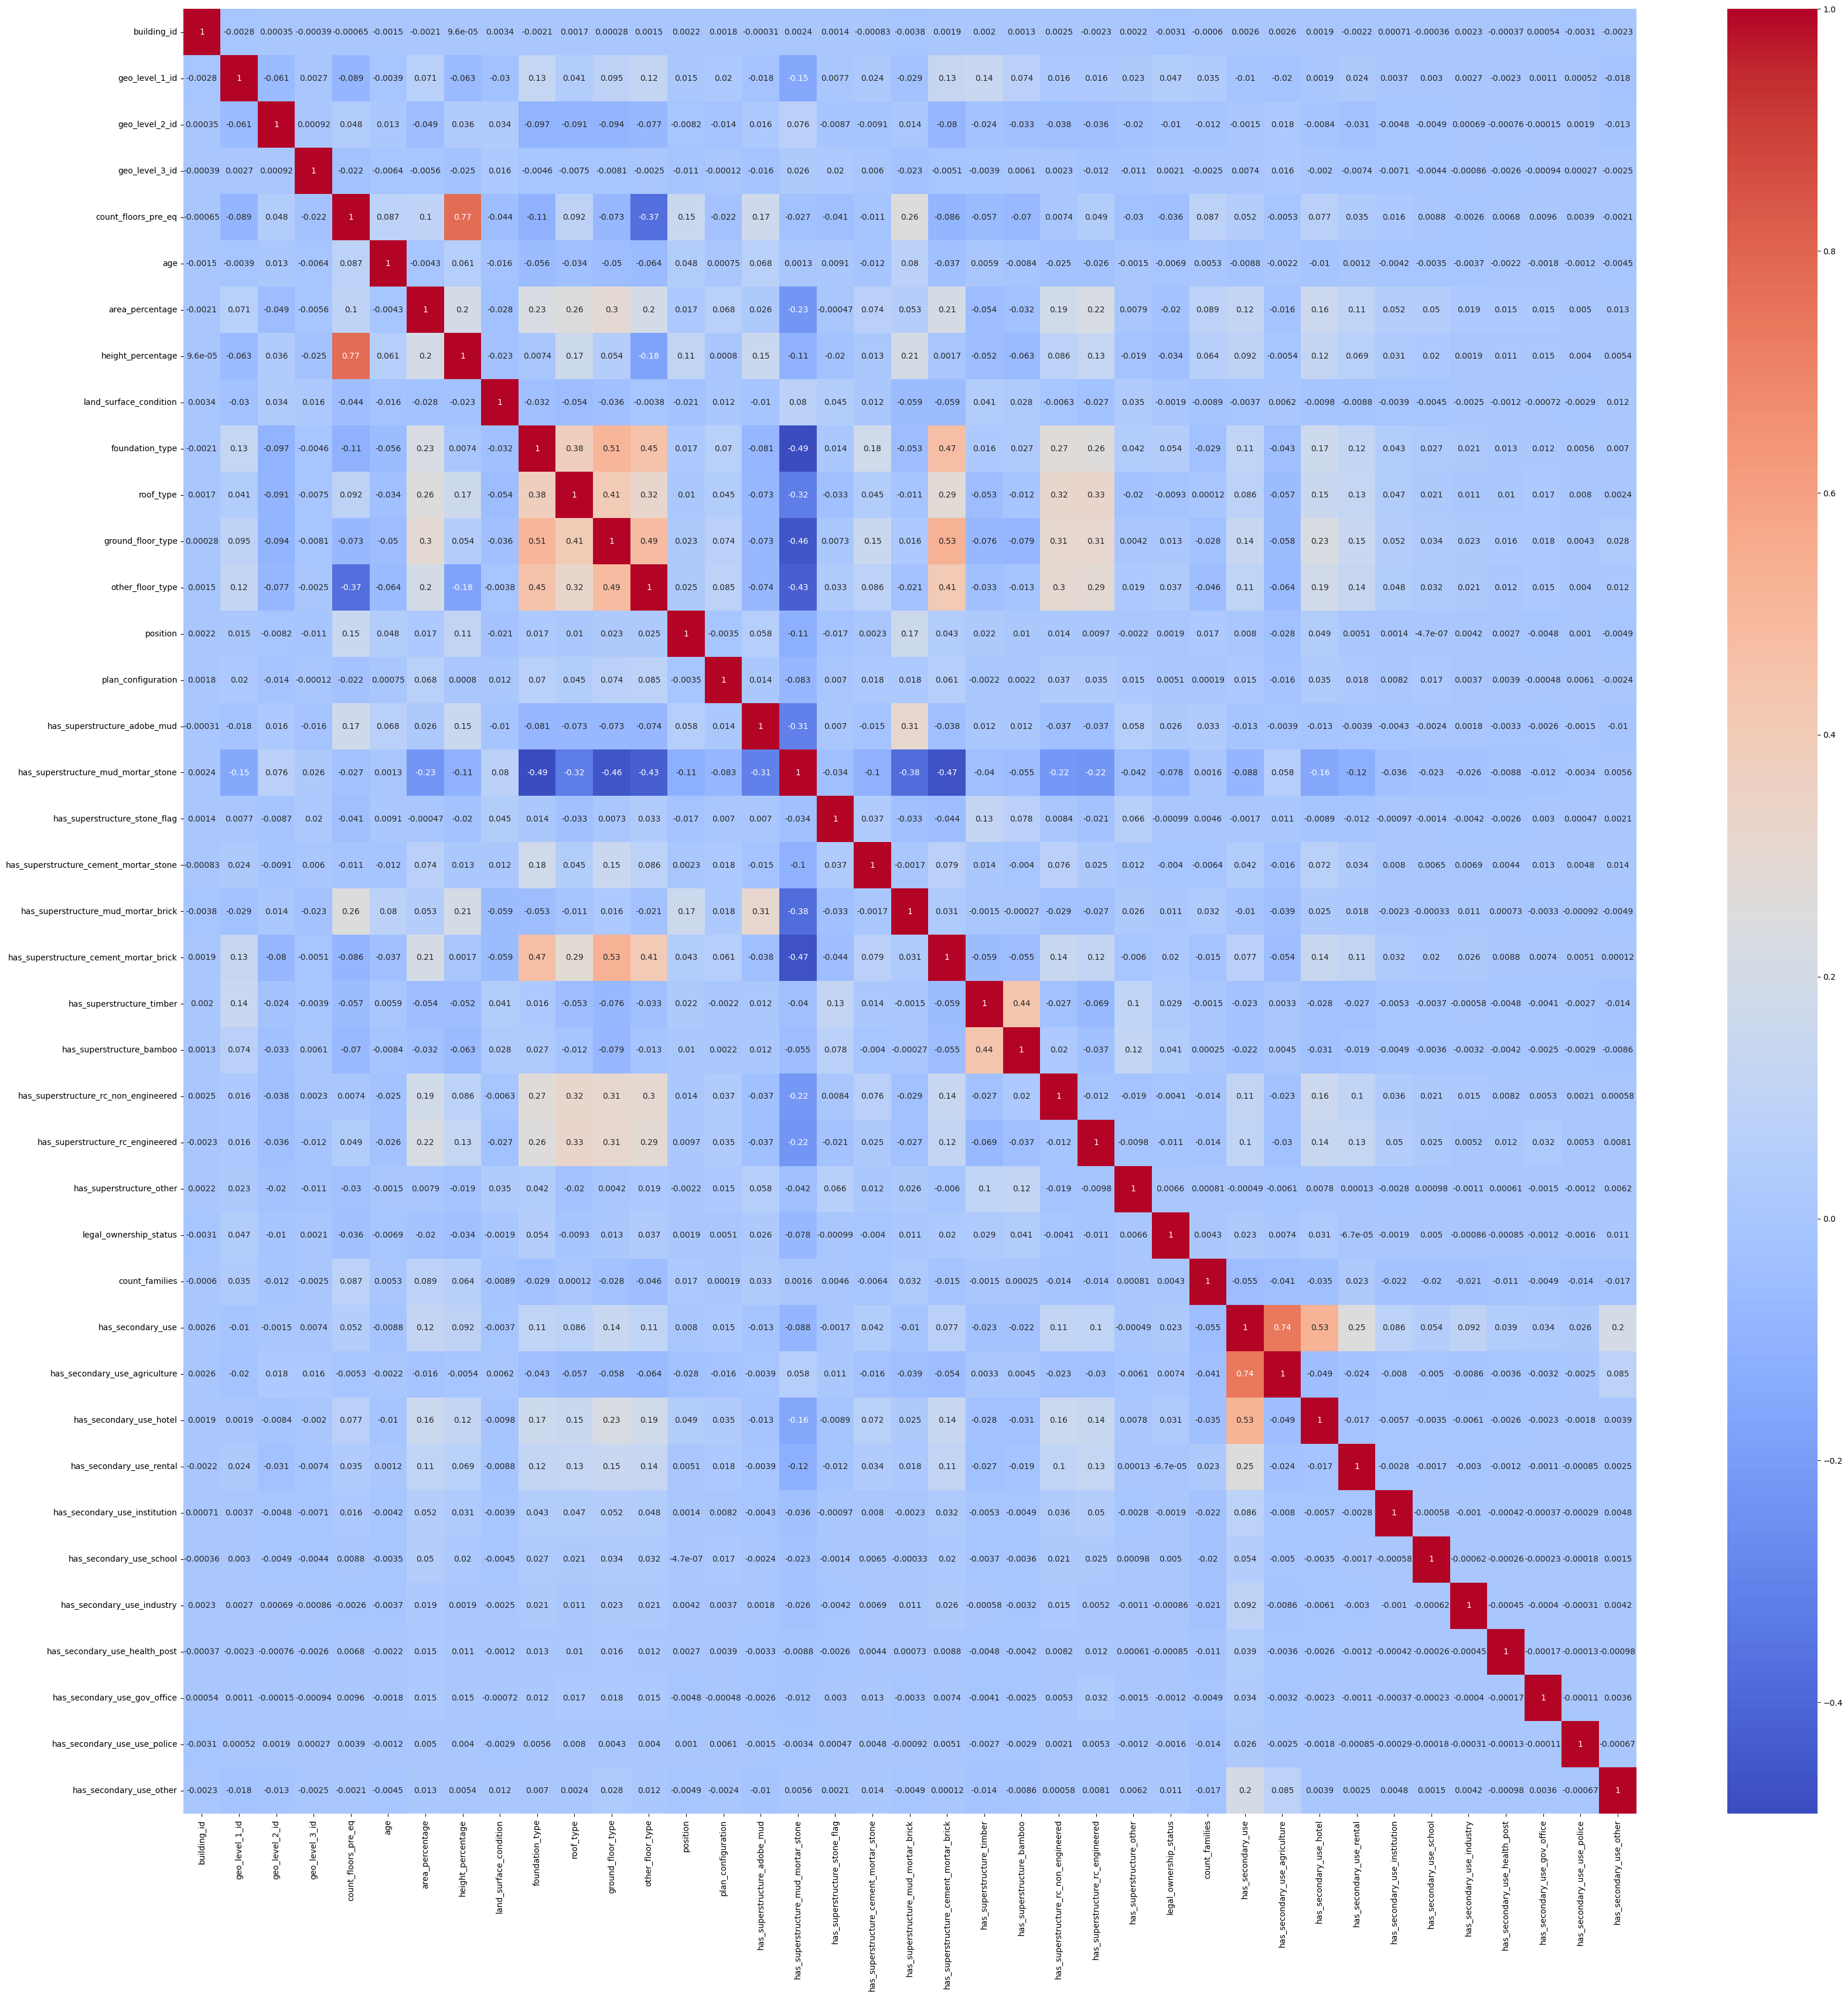

In [11]:
fig, ax = plt.subplots(figsize=(40,40))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Dendogramas**

c:\Users\madre\miniconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
C:\Users\madre\AppData\Local\Temp\ipykernel_11592\12014061.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


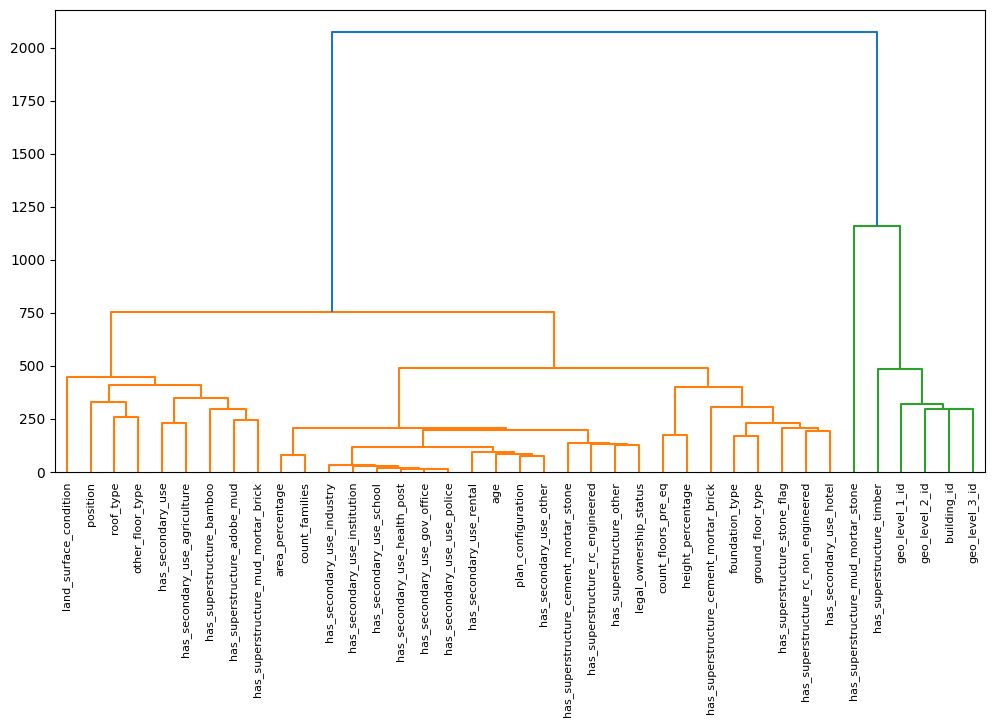

In [12]:
import sklearn.neighbors
import numpy as np
from scipy import cluster	
import matplotlib.pyplot as plt

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean') 
D = dist.pairwise(X_train.T)
avD = np.average(D)
plt.figure(figsize=(12, 6))
threshold_2 = 7
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, labels=X_train.columns.to_list(), leaf_rotation=90)
plt.show()

# Entrenamiento de modelos

In [13]:
from sklearn.model_selection import train_test_split
# Dividir los datos originales en un tercio aleatorio para el conjunto de entrenamiento y dos tercios para el conjunto de prueba
X_train_third, _, y_train_third, _ = train_test_split(
    X_train, y_train, test_size=0.66, random_state=42)

# Dividir el tercio aleatorio en un 20% para el conjunto de prueba y un 80% para el conjunto de entrenamiento
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_train_third, y_train_third, test_size=0.2, random_state=42)


In [14]:
print(f'Total: {len(Xtrain)+len(Xtest)}')

Total: 88604


**Función Matriz de confusión grafica**

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import itertools

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función muestra una matriz de confusión en forma gráfica.
    """
    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Normalizar los valores si es necesario
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configurar el gráfico
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Etiquetar los ejes
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

## Modelo 1 KNN

**PARAMETTOS**
- `n_neighbors` : Este parámetro indica la cantidad de vecinos más cercanos que se utilizarán para realizar las predicciones. Los valores posibles son números enteros positivos. Los valores más comunes suelen ser impares para evitar empates.
- `weights` : Este parámetro indica el método de ponderación de los vecinos más cercanos. Los valores posibles son `uniform`, donde todos los vecinos tienen el mismo peso, y 'distance', donde los vecinos más cercanos tienen un peso mayor que los vecinos más lejanos.
- `algorithm` : Este parámetro indica el algoritmo a utilizar para realizar la búsqueda de vecinos más cercanos. Los valores posibles son `auto`, `ball_tree`, `kd_tree` y `brute`. 'auto' selecciona el mejor algoritmo en función de los datos de entrada, mientras que los otros valores especifican el algoritmo de búsqueda de vecinos más cercanos a utilizar.
- `leaf_size` : Este parámetro se utiliza en los algoritmos `ball_tree` y `kd_tree` y especifica el tamaño de hoja del árbol. Valores más grandes pueden resultar en un tiempo de entrenamiento más corto, pero también pueden reducir la precisión del modelo.
- `p` : Este parámetro indica la métrica de distancia a utilizar. El valor predeterminado es 2 (distancia euclidiana), pero también se puede usar la distancia de Manhattan (p = 1) o la distancia de Minkowski (p> 2).
- `metric` : Este parámetro indica la métrica de distancia a utilizar. Los valores posibles son `euclidean`, `manhattan` y `minkowski`. `euclidean` es la distancia euclidiana, 'manhattan' es la distancia de Manhattan y 'minkowski' es una generalización de las dos primeras que se controla mediante el parámetro p.

**Obtnecion de los mejores parametros**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV


# Definir los hiperparámetros a explorar en el modelo
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_jobs' : [-1]
}

# Crear un objeto KNeighborsClassifier y aplicar la búsqueda aleatoria de hiperparámetros
knc = KNeighborsClassifier()
random_knc = RandomizedSearchCV(estimator=knc, param_distributions=params, cv=5, random_state=0, n_jobs=-1)
random_knc.fit(Xtrain, ytrain)
random_knc.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                     n_jobs=-1, n_neighbors=15, weights='distance')

**Visualizando los resultados**

Los mejores parametros: 
KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                     n_jobs=-1, n_neighbors=15, weights='distance') 
 F1 score -> 0.6522205293155013


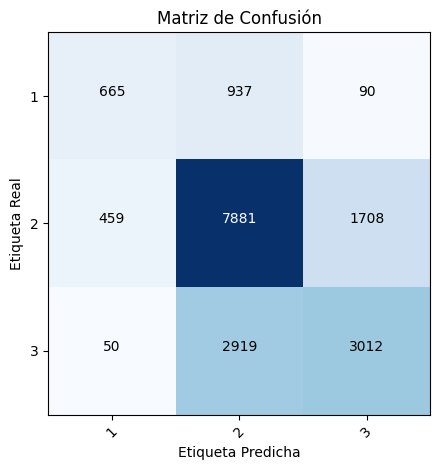

In [ ]:
from sklearn.metrics import f1_score

# Realizar predicciones con el mejor modelo obtenido
predY = random_knc.best_estimator_.predict(Xtest)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(ytest, predY, average='micro', labels=[1,2,3])

# Imprimir los mejores parámetros encontrados y el F1 score obtenido
print(f'Los mejores parametros: \n{random_knc.best_params_} \n F1 score -> {score}')

# Imprimir matriz de confusión
plot_confusion_matrix(ytest, predY, classes = unique_labels(ytest, predY))

**Creando entrega**

In [ ]:
# Cargar el archivo CSV de formato de entrega
entrega_knc = pd.read_csv('./data/submission_format.csv')

# Obtener el mejor estimador del modelo KNN aleatorio
modelo_knc = random_knc.best_estimator_

# Entrenar el modelo KNN con los datos de entrenamiento al completo
modelo_knc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de datos de prueba
y_pred = modelo_knc.predict(X_test)

# Asignar las predicciones a la columna 'damage_grade' del archivo CSV de formato de entrega
entrega_knc['damage_grade'] = y_pred

# Guardar el archivo CSV de formato de entrega con las predicciones realizadas
entrega_knc.to_csv('entrega_knc.csv', index=False)

**Resultados de la entrega**

Con esta entrega me posicione en el top 1806

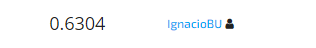

## Model 2 SVM

**PARAMETTOS**
- `C` : Parámetro de regularización. Cuanto mayor es `C`, menor es la regularización. Valores altos pueden conducir a overfitting.
- `kernel` : Especifica el kernel a ser utilizado en el modelo. Las opciones son `linear`, `poly`, `rbf` y `sigmoid`.
- `degree` : Grado de la función de kernel polinómico. Solo es considerado si `kernel` es `poly`.
- `gamma` : Coeficiente del kernel. Solo es considerado para `rbf`, `poly` y `sigmoid`. `gamma='scale'` (predeterminado) es 1 / (n_features * X.var()) y `gamma='auto'` utiliza 1 / n_features. También se puede especificar un valor numérico.
- `shrinking` : Si se utiliza la heurística de contracción para acelerar el entrenamiento. Los valores posibles son `True` y `False`.
- `decision_function_shape` : Especifica cómo combinar las decisiones de múltiples clases. `ovo` (uno contra uno) o `ovr` (uno contra el resto).
- `break_ties` : Si es verdadero, `decision_function_shape='ovr'` y dos o más clases tienen valores de decisión iguales, entonces la decisión se determina por el primer clasificador. Si es falso, se utiliza la clasificación predict_proba.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'C': [1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'shrinking': [False],
    'decision_function_shape': ['ovo', 'ovr'],
    'break_ties': [True, False]
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
svm = SVC()

random_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, cv=5, random_state=0, n_jobs=-1)
random_svm.fit(Xtrain[:40000], ytrain[:40000])
print('Done!')

c:\Users\madre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [     nan 0.4697   0.61905  0.57625       nan 0.577075 0.577075 0.577075
 0.5773        nan]
  warnings.warn(


Done!


**Visualizando los resultados**

Los mejores parametros: 
SVC(C=10, break_ties=True, shrinking=False) 
 F1 score -> 0.6201117318435754


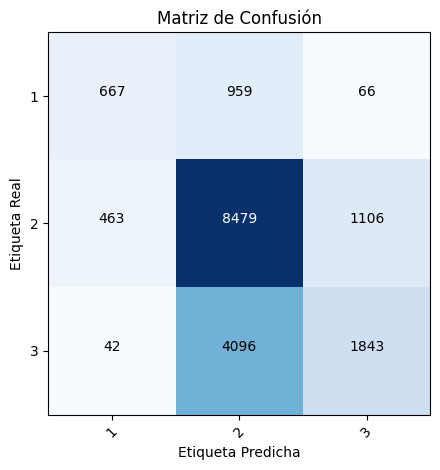

In [ ]:
from sklearn.metrics import f1_score

# Realizar predicciones con el mejor modelo obtenido
predY = random_svm.best_estimator_.predict(Xtest)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(ytest, predY, average='micro', labels=[1,2,3])

# Imprimir los mejores parámetros encontrados y el F1 score obtenido
print(f'Los mejores parametros: \n{random_svm.best_params_} \n F1 score -> {score}')

# Imprimir matriz de confusión
plot_confusion_matrix(ytest, predY, classes = unique_labels(ytest, predY))

**Creando entrega**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

# Cargar el archivo CSV de formato de entrega
entrega_svm = pd.read_csv('./data/submission_format.csv')

# Obtener el mejor estimador del modelo KNN aleatorio
n_estimators = 10
modelo_svm =  OneVsRestClassifier(BaggingClassifier(random_svm.best_estimator_, max_samples=1.0 / n_estimators, n_estimators=n_estimators),n_jobs=-1)

# Entrenar el modelo KNN con los datos de entrenamiento al completo
modelo_svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de datos de prueba
y_pred = modelo_svm.predict(X_test)

# Asignar las predicciones a la columna 'damage_grade' del archivo CSV de formato de entrega
entrega_svm['damage_grade'] = y_pred

# Guardar el archivo CSV de formato de entrega con las predicciones realizadas
entrega_svm.to_csv('entrega_svm.csv', index=False)

**Resultados de la entrega**


Con esta entrega me posicione en el top 1854

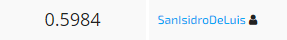

## Leazy predict

**Busqueda del mejor modelo segun `lazypredict`**

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain[:40000], Xtest[:40000], ytrain[:40000], ytest[:40000])
models

100%|██████████| 29/29 [06:27<00:00, 13.35s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.68,0.60,None,0.67,2.20
LGBMClassifier,0.70,0.60,None,0.69,0.46
RandomForestClassifier,0.70,0.59,None,0.68,5.75
ExtraTreesClassifier,0.68,0.59,None,0.67,4.50
DecisionTreeClassifier,0.61,0.56,None,0.61,0.35
BernoulliNB,0.55,0.53,None,0.55,0.11
NearestCentroid,0.47,0.53,None,0.45,0.07
KNeighborsClassifier,0.59,0.52,None,0.59,0.82
ExtraTreeClassifier,0.58,0.52,None,0.58,0.10


EL modelo que he elegido es [`LGBMClassifier`](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) ya que tiene el mejor resultado en el F1 Score métrica que se para corregir las entregas.

**PARAMETTOS**

- `n_estimators`: El número de rondas de boosting que se realizarán. Se muestrea aleatoriamente de un rango de 50 a 200 utilizando `sp_randint`.

- `learning_rate`: El tamaño del paso de contracción utilizado en la actualización para evitar el sobreajuste. Esta es una lista de posibles valores, incluyendo 0.01, 0.05, 0.1 y 0.5.

- `max_depth`: La profundidad máxima de un árbol. Se muestrea aleatoriamente de un rango de 2 a 10 utilizando `sp_randint`.

- `num_leaves`: El número máximo de hojas en un árbol. Se muestrea aleatoriamente de un rango de 10 a 100 utilizando `sp_randint`.

- `reg_alpha`: Término de regularización L1 en los pesos. Esta es una lista de posibles valores, incluyendo 0, 0.1, 0.5 y 1.

- `reg_lambda`: Término de regularización L2 en los pesos. Esta es una lista de posibles valores, incluyendo 0, 0.1, 0.5 y 1.

- `subsample`: Proporción de submuestreo de las instancias de entrenamiento. Esta es una lista de posibles valores, incluyendo 0.6, 0.7, 0.8, 0.9 y 1.0.

- `colsample_bytree`: Proporción de submuestreo de las columnas al construir cada árbol. Esta es una lista de posibles valores, incluyendo 0.6, 0.7, 0.8, 0.9 y 1.0.


**Obtención de los mejores parámetros**

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint as sp_randint


# Define LGBMClassifier model
model = lgb.LGBMClassifier(objective='multiclass', n_jobs=-1)

# Define hyperparameter search space
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': sp_randint(2, 10),
    'num_leaves': sp_randint(10, 100),
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Define RandomizedSearchCV object
random_lgb = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist,
    cv=5, 
    random_state=42,
    n_jobs=-1
)

# Fit model to training data
random_lgb.fit(Xtrain, ytrain)

print('Done!')

Done!


**Visualizando los resultados**

Los mejores parametros: 
LGBMClassifier(colsample_bytree=0.7, learning_rate=0.5, max_depth=5,
               n_estimators=64, num_leaves=71, objective='multiclass',
               reg_alpha=0.1, reg_lambda=0.5, subsample=0.8) 
 F1 score -> 0.7118108458890581


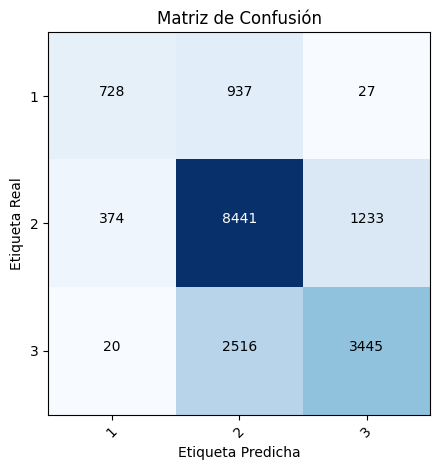

In [ ]:
from sklearn.metrics import f1_score

# Realizar predicciones con el mejor modelo obtenido
predY = random_lgb.best_estimator_.predict(Xtest)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(ytest, predY, average='micro', labels=[1,2,3])

# Imprimir los mejores parámetros encontrados y el F1 score obtenido
print(f'Los mejores parametros: \n{random_lgb.best_params_} \n F1 score -> {score}')

# Imprimir matriz de confusión
plot_confusion_matrix(ytest, predY, classes = unique_labels(ytest, predY))

**Creando entrega**

In [ ]:
# Cargar el archivo CSV de formato de entrega
entrega_lgb = pd.read_csv('./data/submission_format.csv')

# Obtener el mejor estimador del modelo KNN aleatorio
modelo_lgb = random_lgb.best_estimator_

# Entrenar el modelo KNN con los datos de entrenamiento al completo
modelo_lgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de datos de prueba
y_pred = modelo_lgb.predict(X_test)

# Asignar las predicciones a la columna 'damage_grade' del archivo CSV de formato de entrega
entrega_lgb['damage_grade'] = y_pred

# Guardar el archivo CSV de formato de entrega con las predicciones realizadas
entrega_lgb.to_csv('entrega_lgb.csv', index=False)

**Resultados de la entrega**


Con esta entrega me posicione en el top 1594

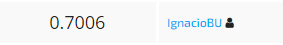

## XGBoost

**PARAMETTOS**

- `n_estimators`: El número de rondas de boosting que se realizarán. Este parámetro se refiere al número de árboles que se construirán en el modelo. Valores más altos pueden mejorar la precisión del modelo, pero también aumentan el tiempo de entrenamiento y el riesgo de sobreajuste. En este caso, se utiliza `sp_randint` para muestrear aleatoriamente un valor entero dentro de un rango de 50 a 200.

- `learning_rate`: El tamaño del paso de contracción utilizado en la actualización para evitar el sobreajuste. Un learning rate más bajo significa que se necesitan más iteraciones para entrenar el modelo, pero puede mejorar la precisión y reducir el riesgo de sobreajuste. En este caso, se proporciona una lista de posibles valores de learning rate, incluyendo 0.01, 0.05, 0.1 y 0.5.

- `max_depth`: La profundidad máxima de un árbol. Este parámetro controla la complejidad del árbol, lo que afecta la precisión del modelo y el riesgo de sobreajuste. Una profundidad más alta puede permitir al modelo capturar relaciones más complejas entre las variables de entrada, pero también puede aumentar el riesgo de sobreajuste. En este caso, se utiliza `sp_randint` para muestrear aleatoriamente un valor entero dentro de un rango de 2 a 10.

- `reg_alpha`: Término de regularización L1 en los pesos. Este parámetro se utiliza para penalizar pesos grandes y evitar el sobreajuste. Un valor más alto de `reg_alpha` reduce el riesgo de sobreajuste pero también puede disminuir la precisión del modelo. En este caso, se proporciona una lista de posibles valores de `reg_alpha`, incluyendo 0, 0.1, 0.5 y 1.

- `reg_lambda`: Término de regularización L2 en los pesos. Este parámetro se utiliza para penalizar la complejidad del modelo y evitar el sobreajuste. Al igual que `reg_alpha`, un valor más alto de reg_lambda reduce el riesgo de sobreajuste pero también puede disminuir la precisión del modelo. En este caso, se proporciona una lista de posibles valores de reg_lambda, incluyendo 0, 0.1, 0.5 y 1.

- `subsample`: Proporción de submuestreo de las instancias de entrenamiento. Este parámetro controla qué fracción de los datos de entrenamiento se utiliza para construir cada árbol. Un valor más bajo puede reducir el tiempo de entrenamiento y el riesgo de sobreajuste, pero también puede disminuir la precisión del modelo.

**Obtención de los mejores parámetros**

In [27]:
import xgboost as xgb
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint


# Define the parameter space for RandomizedSearchCV
params = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': randint(2, 10),
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}


# Define the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42, n_jobs=-1)

# Define the RandomizedSearchCV object
random_xgb = RandomizedSearchCV(model, param_distributions=params, n_iter=100, cv=3, n_jobs=-1)

# Train the model with RandomizedSearchCV
random_xgb.fit(Xtrain, ytrain-1)

[21:07:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1D4BAE320>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1D4BADC90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F1D4BAF220>,
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

**Visualizando los resultados**

Los mejores parametros: 
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 172, 'num_leaves': 38, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.7} 
F1 score -> 0.7269905761525873


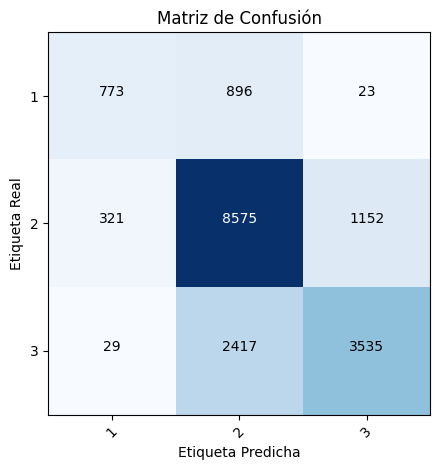

In [28]:
from sklearn.metrics import f1_score

# Realizar predicciones con el mejor modelo obtenido
predY = random_xgb.best_estimator_.predict(Xtest)

# Evaluar el modelo mediante el cálculo del F1 score
score = f1_score(ytest, predY+1, average='micro', labels=[1,2,3])

# Imprimir los mejores parámetros encontrados y el F1 score obtenido
print(f'Los mejores parametros: \n{random_xgb.best_params_} \nF1 score -> {score}')

# Imprimir matriz de confusión
plot_confusion_matrix(ytest, predY+1, classes = unique_labels(ytest, predY+1))

**Creando entrega**

In [29]:
# Cargar el archivo CSV de formato de entrega
entrega_xgb = pd.read_csv('./data/submission_format.csv')

# Obtener el mejor estimador del modelo KNN aleatorio
modelo_xgb = random_xgb.best_estimator_

# Entrenar el modelo KNN con los datos de entrenamiento al completo
modelo_xgb.fit(X_train, y_train-1)

# Realizar predicciones en el conjunto de datos de prueba
y_pred = modelo_xgb.predict(X_test)

# Asignar las predicciones a la columna 'damage_grade' del archivo CSV de formato de entrega
entrega_xgb['damage_grade'] = y_pred+1

# Guardar el archivo CSV de formato de entrega con las predicciones realizadas
entrega_xgb.to_csv('entrega_xgb.csv', index=False)

[21:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



**Resultados de la entrega**


Con esta entrega me posicione en el top 1429

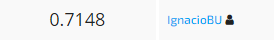